# **UNIFAL - UNIVERSIDADE FEDERAL DE ALFENAS** <br>
Bacharelado de Ciência da Computação


---


Disciplina de Análise Exploratória de Dados

Guilherme Henrique Pereira Serafini | 2021.1.08.048<br>
Luca Ferro Oliveira | 2021.1.08.014<br>
Túlio Sérgio Rosa Trombini | 2021.1.08.022

# **Conjunto "Maternal Health Risk Data"** <br>

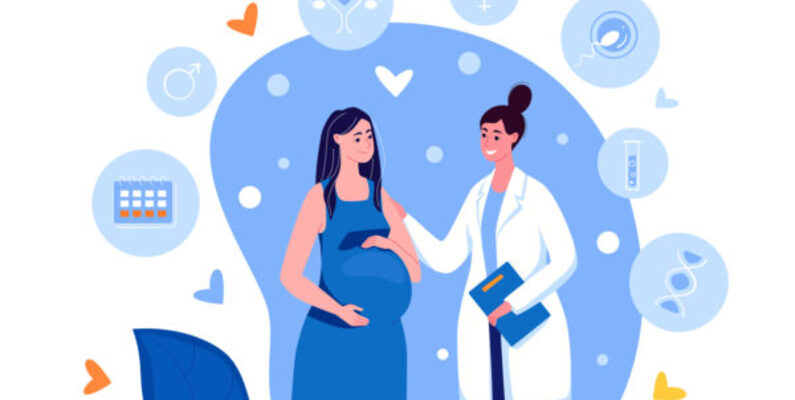

A base de dados que será analisada nesta atividade será uma análise dos riscos de saúde para gestantes, buscando prever e prover o diagnóstico para as pacientes.

# **Importar bibliotecas e a Base de Dados**

Para realizar os cálculos necessários para tratar estes dados, utilizamos das seguintes bibliotecas Python:


1.   **Pandas (pd)**
2.   **Matplotlib (plt)**
3.   **Seaborn (sns)**
4.   **Numpy (np)**

Depois disso, vamos importar a base de dados de um repositório do GitHub, afim de evitar problemas com a sincronização dos arquivos do Google Drive.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

baseDados = "https://raw.githubusercontent.com/luca-ferro/anal-expl-dados/main/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(baseDados)

Aqui, medimos a dimensão dos dados da base, enumerando suas instâncias e seus atributos.

In [ ]:
print("Dimensão dos dados:")
print("Linhas (Instâncias): {}".format(df.shape[0]))
print("Colunas (Atributos): {}".format(df.shape[1]))

Dimensão dos dados:
Linhas (Instâncias): 1014
Colunas (Atributos): 7


**Especificação dos atributos da base de dados:**

*   Age: Idade da gestante.
*   SystolicBP: Maior valor da Pressão Arterial em mmHg, outro atributo significativo durante a gestação.
*   DiastolicBP: Menor valor da Pressão Arterial em mmHg, outro atributo significativo durante a gestação.
*   BS: Níveis de glicose no sangue são em termos de uma concentração molar, mmol/L.
*   BodyTemp: Temperatura corporal da gestante.
*   HeartRate: Uma frequência cardíaca normal em repouso em batimentos por minuto.
*   Risk Level: Nível de Intensidade de Risco Predito durante a gestação considerando os atributos anteriores.



In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# **Análise dos Dados**

Primeiramente, decidimos buscar a média dos maiores valores da Pressão Arterial (em mmHg) das gestantes, para analisar se há alguma relação com os riscos do processo de gravidez.

In [ ]:
rl_sbp  =  df.groupby ( 'RiskLevel' ).SystolicBP.mean()
rl_sbp

RiskLevel
high risk    124.194853
low risk     105.866995
mid risk     113.154762
Name: SystolicBP, dtype: float64

A partir destes dados, plotamos um gráfico que coloca em evidência essa diferença.

Percebe-se que há uma diferença evidente na pressão de pacientes que apresentaram um maior risco, beirando 124.2mmHg, enquanto pacientes de menor risco apresentam 105.9mmHg.

Ou seja, é possível afirmar que o nível do maior valor da Pressão Arterial da gestante pode afetar os riscos de sua gravidez.


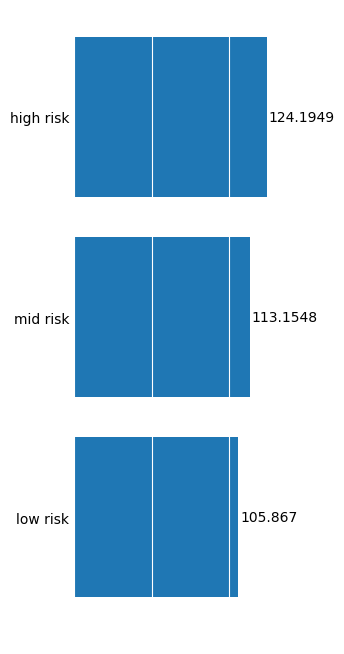

In [ ]:
#Comando para realizar uma exibição gráfica da variavel rl_sbp:

plt.figure(figsize=(3, 8))
ax = plt.gca()
rl_sbp2 = rl_sbp.sort_values()
makes = rl_sbp2.index
speeds = rl_sbp2.values.round(4)
nums = np.arange(len(rl_sbp2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Neste gráfico, plotamos todos os valores de SystolicBP e colocamos em perspectiva com os valores médios descobertos anteriormente, afim de criar "parâmetros" para prever os riscos baseado nos intervalos das médias.

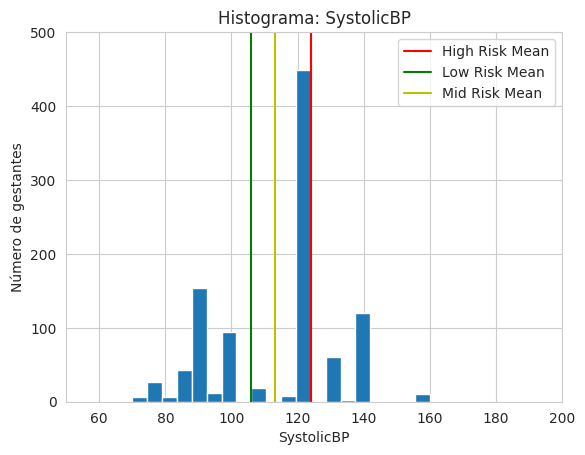

In [ ]:
# Criando uma nova tabela com os mesmos dados pois rl_sbp não estava funcionando do jeito correto
table = pd.DataFrame({'RiskLevel': ['high risk', 'low risk', 'mid risk'], 'SystolicBP': [124.194853, 105.866995, 113.154762]})

with sns.axes_style("whitegrid"):
    plt.hist(df.SystolicBP.values, bins=20)
    plt.xlim(50, 200)
    plt.ylim([0, 500])
    plt.axvline(table[table['RiskLevel'] == 'high risk']['SystolicBP'].values[0], 0, 1, color='r', label='High Risk Mean')
    plt.axvline(table[table['RiskLevel'] == 'low risk']['SystolicBP'].values[0], 0, 1, color='g', label='Low Risk Mean')
    plt.axvline(table[table['RiskLevel'] == 'mid risk']['SystolicBP'].values[0], 0, 1, color='y', label='Mid Risk Mean')
    plt.xlabel("SystolicBP")
    plt.ylabel("Número de gestantes")
    plt.title("Histograma: SystolicBP")
    plt.legend()

Nessa parte, plotamos um gráfico BoxPlot para verificar a relação entre a idade das gestante com o risco do processo. Percebe-se que, quanto mais idade tem a gestante, maiores são os riscos, enquanto as mais novas apresentam menos risco.

<Axes: xlabel='RiskLevel', ylabel='Age'>

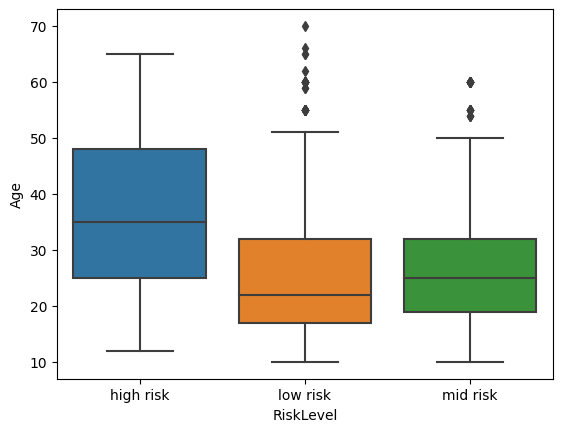

In [ ]:
#Apresentando gráficos BoxPlot de algumas variáveis em relação a Age.

sns.boxplot(x="RiskLevel", y="Age", data=df)

Analisando a relação entre as variáveis através de um gráfico do tipo PairPlot.

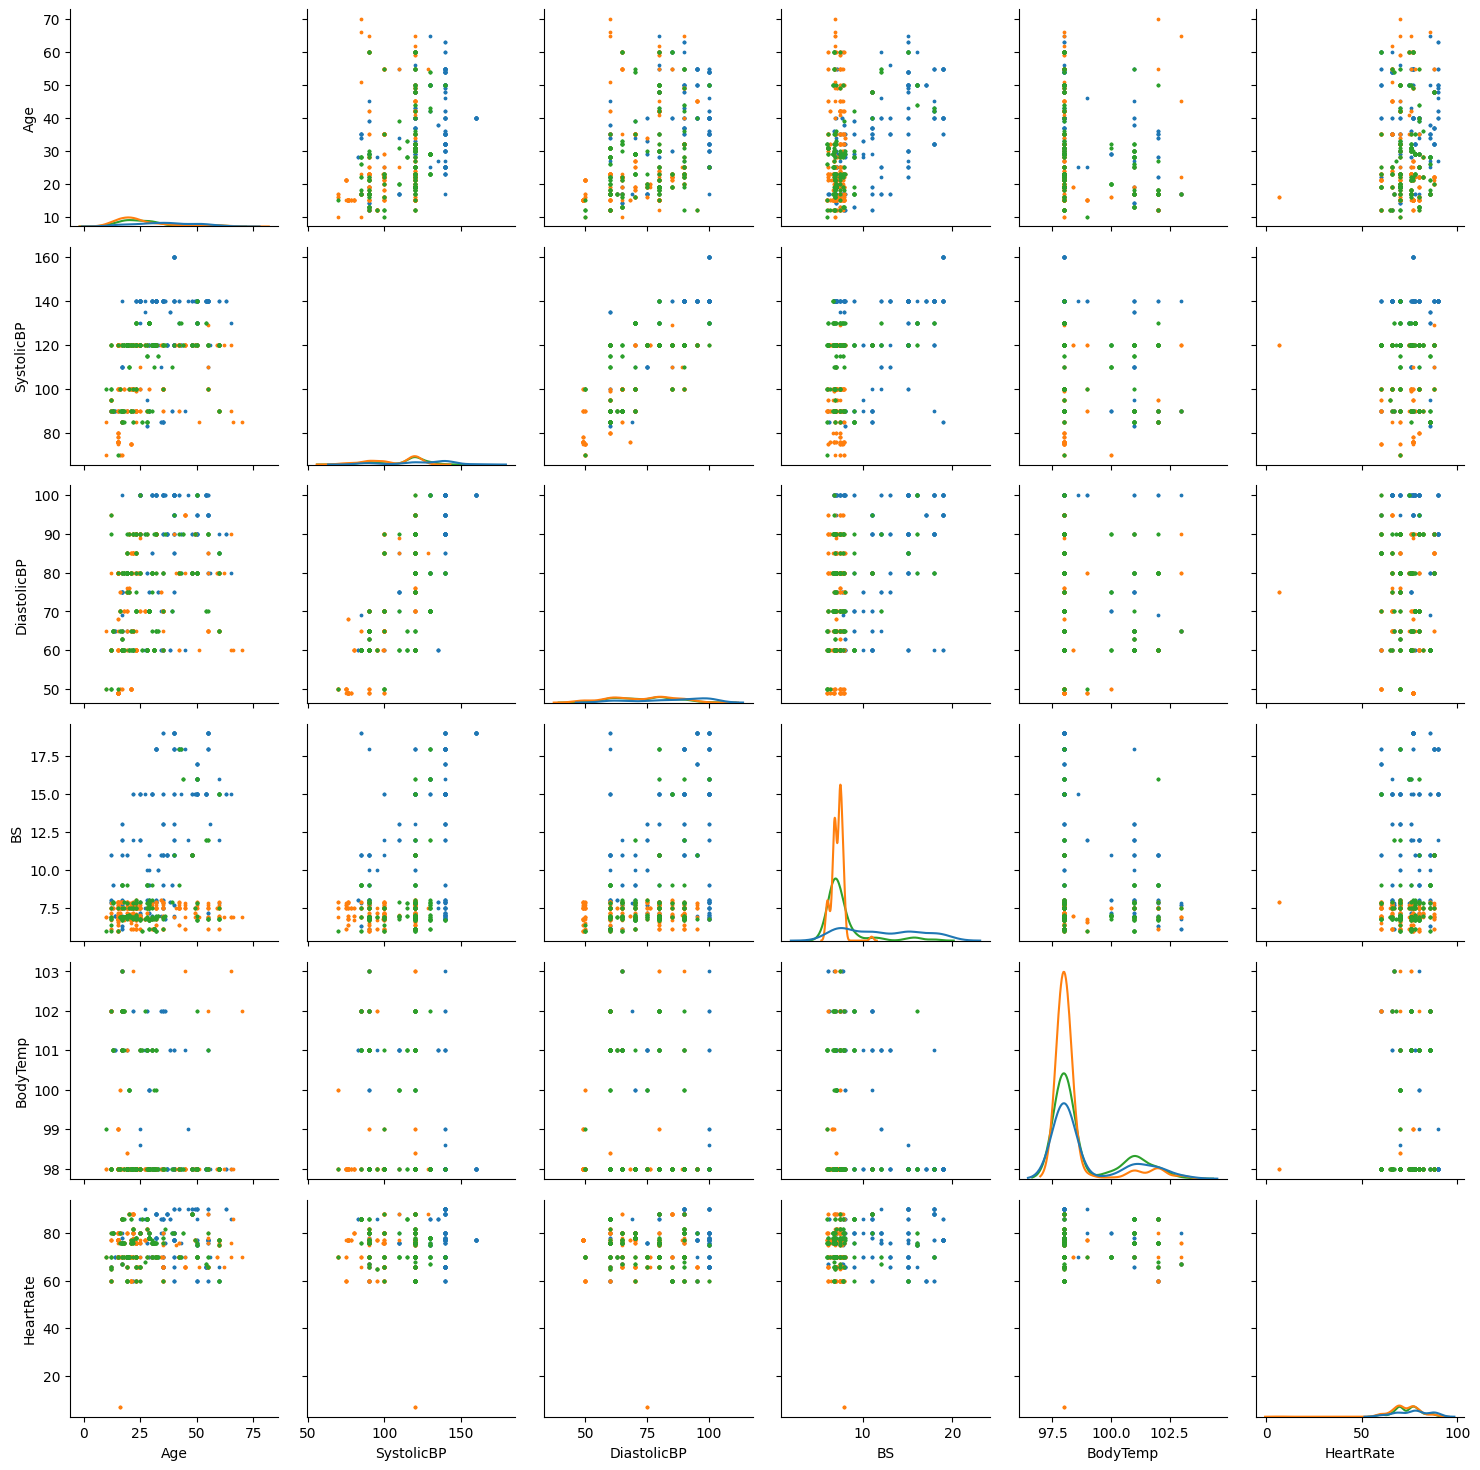

In [ ]:
#Criando um gráfico PairPlot com as variáveis Age

g = sns.PairGrid(df, vars=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], hue="RiskLevel")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=3)

O coeficiente de correlação de Pearson é um parâmetro adequado para medir a relação entre as variáveis.

In [ ]:
#Calculando o coeificiente de correlação entre algumas variáveis da base de dados;

df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


Apresentando o coeficiente de correlação de forma gráfica utilizando um mapa de calor.

<ipython-input-65-3eda2c2dfe7e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.7,vmax=1.0, square=True, annot=True)


<Axes: title={'center': 'Correlação de Pearson - HeatMap'}>

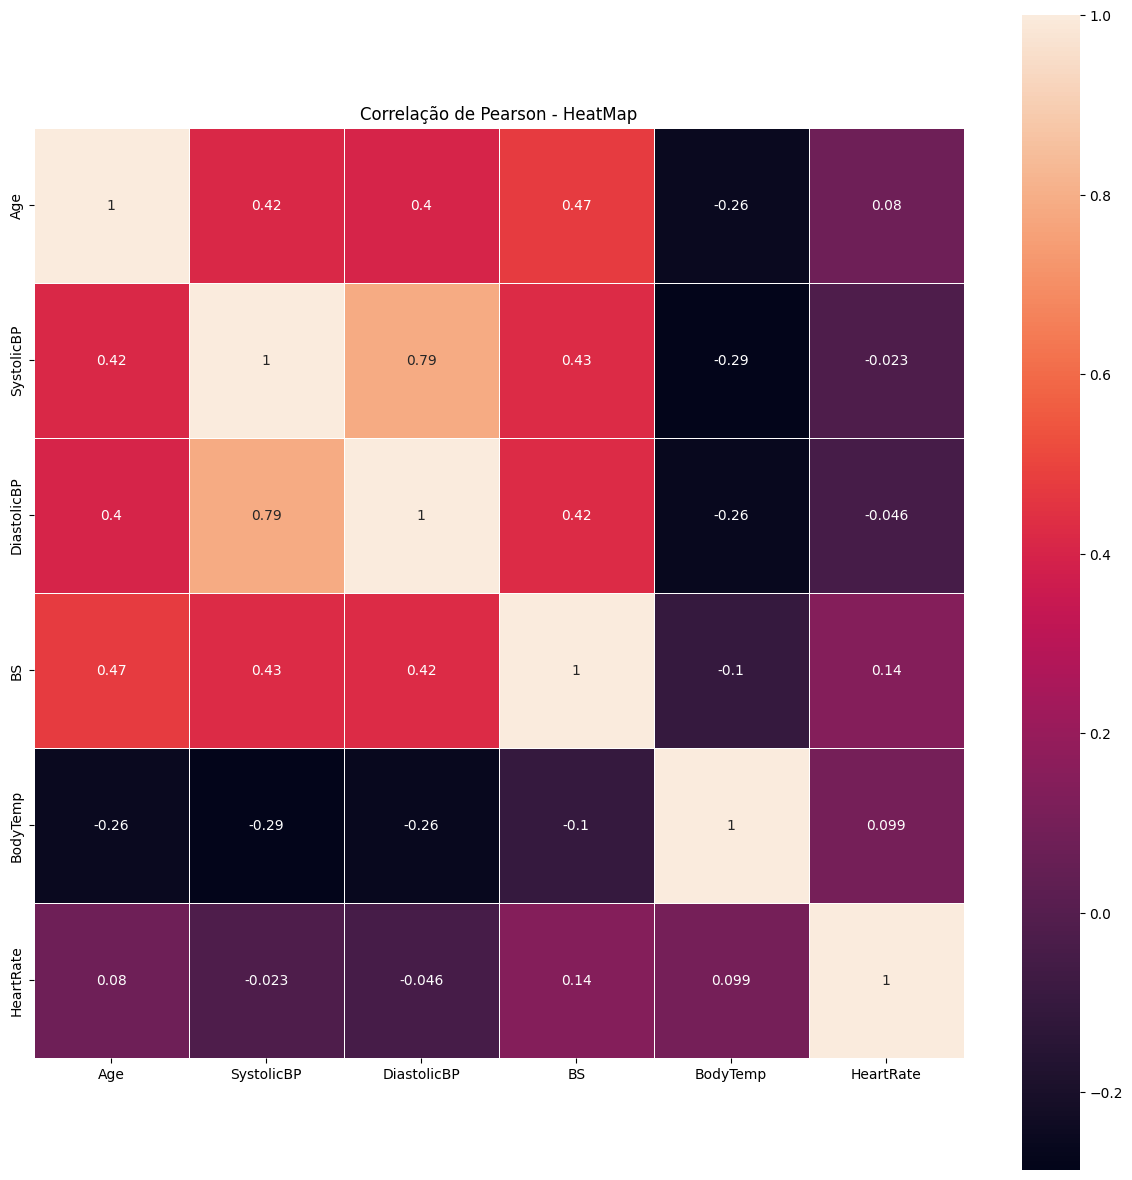

In [ ]:
#Apresentando a correlação através de um mapa de calor.
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Correlação de Pearson - HeatMap')

sns.heatmap(df.corr(),linewidths=0.7,vmax=1.0, square=True, annot=True)

Aprimorando a exibição de gráfico de pares com a sinalização da tendência.

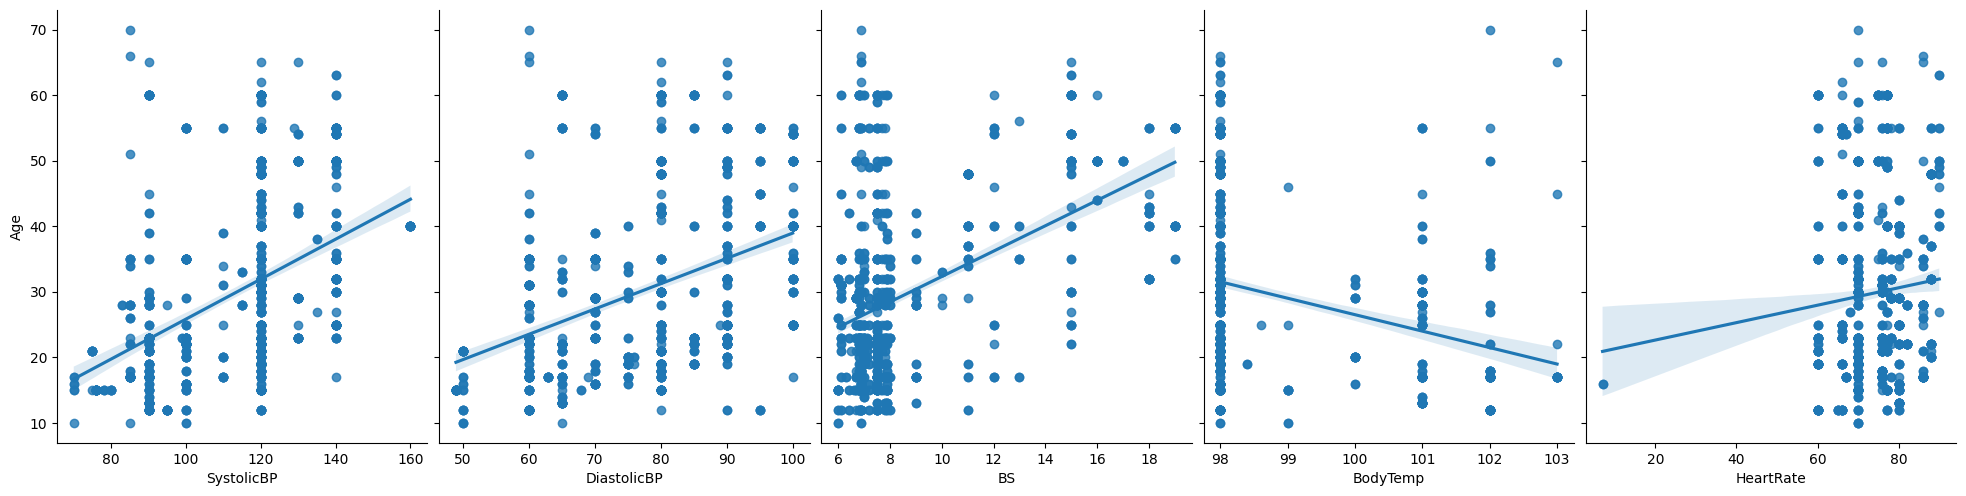

In [ ]:
#Grafico PairPlot com sinalização da tendência.

sns.pairplot(df, x_vars=['SystolicBP','DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], y_vars=["Age"],
             height=5, aspect=.8, kind="reg");